<a href="https://colab.research.google.com/github/hainmit09/DataAnalysis/blob/main/B%C3%A0i_6_Ki%E1%BB%83m_%C4%91%E1%BB%8Bnh_gi%E1%BA%A3_thi%C3%AAt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kiểm định giả thuyết

# Cách 1: Các bước làm kiểm địng giả thuyết (tính bằng tay)
- Bước 1: Viết giả thuyến không (Null hypothesis - Giả thuyết vô hiệu)H0
- Bước 2: Viết giả thuyết H1
- Bước 3: Xác định mức ý nghĩa (alpha), chú ý phải chia 2 nếu mà bài toán là ước lượng không phải 2 phía.
- Bước 4 tính điểm (z-score hoặc T-score) dựa trên alpha.
- Bước 5: Tính điểm theo dữ liệu thực tế (sử dụng công thức z-score hoặc t-score).
- Bước 6: Kết luận: Nếu điểm bước 5 lớn hơn xác suất của mức ý nghĩa, thì điểm bác bỏ H0, chấp nhận H1.




# Cách 2: Sử dụng các hàm có sẵn của python
- Bước 1: Viết giả thuyến không (Null hypothesis - Giả thuyết vô hiệu)H0
- Bước 2: Viết giả thuyết H1
- Bước 3: Xác định mức ý nghĩa (alpha), chú ý phải chia 2 nếu mà bài toán là ước lượng không phải 2 phía.
- Bước 4: Gọi hàm scipy.stats.ttest_1samp (cho bài toán kiểm định 1 tập giá trị - ví dụ bài toán chiều cao của người việt nam) và gọi hàm scipy.stats.ttest_ind (cho bài toán kiểm định 2 tập giá trị - chiều cao của người Ha nội liệu có cao hơn chiều cao của HCM)
- Bước 5 kết luận: Bác bỏ H0, chấp nhận H1 nếu
  + Kiểm định 2 phía: p<alpha: 
  + Kiểm định phía trái: p<2*alpha và đồng thời statics<0
  + Kiểm định phía phải: p<2*alpha và đồng thời statics>0


# Bài tập: Kiểm định giả thuyết sau: Thanh toán không được tăng trưởng trong năm 2016, trên tập dữ liệu data_pay.csv

#0. Import các thư viện cần thiết

In [25]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

# Đọc dữ liệu vào pandas

In [2]:
df =  pd.read_csv('/content/data_pay.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,52450.56,11331.00,...,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,89303.76,20036.32,...,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,...,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,...,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,47911.51,13493.87,...,SERVICE EMPLOYEES UNIT,4,3156,A,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/3156.pdf


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231463 entries, 1 to 274160
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        231463 non-null  int64  
 1   Year                          231463 non-null  int64  
 2   Department Title              231463 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 231463 non-null  object 
 5   Job_title                     231463 non-null  object 
 6   Employment Type               231463 non-null  object 
 7   Hourly or Event Rate          231463 non-null  object 
 8   Annual_sal                    231463 non-null  object 
 9   Q1 Payments                   231463 non-null  object 
 10  Q2 Payments                   231463 non-null  object 
 11  Q3 Payments                   231463 non-null  object 
 12  Q4 Payments                   231463 non-nul

#2. Làm sạch dữ liệu

Chỉ lấy các dòng dữ liệu mà cột "Payroll Department" không null

In [6]:
df = df[pd.notnull(df['Payroll Department'])]

Thay đổi tên cột để dễ thao tác hơn

In [7]:
df.rename(columns={"Projected Annual Salary": "Annual_sal", "Job Class Title": "Job_title", "Base Pay": "Base_Pay"}, inplace=True)

Loại bỏ ký tự đặc biệt trong trường số tiền

In [9]:
for i in ['Annual_sal', 'Q1 Payments', 'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay', 'Total Payments', 'Base_Pay', 'Permanent Bonus Pay', 'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay', 'Overtime Pay', 'Other Pay & Adjustments', 'Other Pay (Payroll Explorer)', 'Average Health Cost', 'Average Dental Cost', 'Average Basic Life', 'Average Benefit Cost']:
  df[i]=df[i].str.replace('$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Loại bỏ dữ liệu ngoại lai

In [12]:
df = df[df.Annual_sal != 0]
df = df[df.Base_Pay != 0]


In [13]:
df.Annual_sal = df.Annual_sal.astype(float)
df.Base_Pay = df.Base_Pay.astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


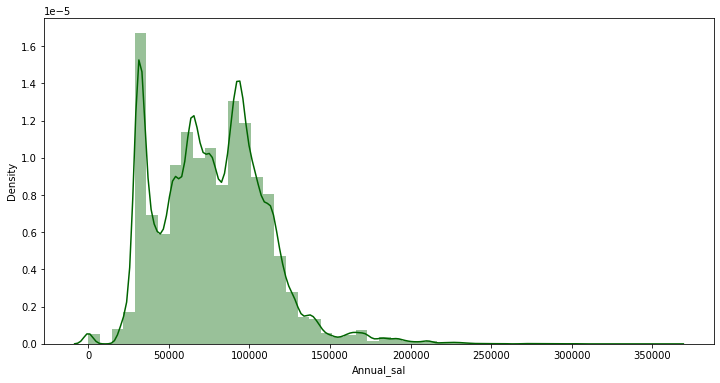

In [15]:
plt.figure(figsize=(12, 6))
sns.distplot(df.Annual_sal, color='darkgreen')

In [16]:
df.Year.unique()

array([2013, 2014, 2016, 2015])

Lọc dữ liệu 2016

In [18]:
df_2016 = df[df.Year == 2016]
df_2015 = df[df.Year == 2015]


# Bài toán, Thực hiện kiểm định thanh toán có tăng trưởng hay không giữa 2 năm 2015, 2016

# Làm theo cách 1

Tính một số tham số để tính điểm z-score


In [20]:
pop_mean_2015 = df_2015.Annual_sal.mean()
pop_std_2015 = statistics.stdev(df_2015.Annual_sal)
print("pop_mean_2015", pop_mean_2015)
print("pop_std_2015", pop_std_2015)

pop_mean_2015 76046.39152505301
pop_std_2015 34232.25489729045


Lấy tập mẫu cho 2016

In [21]:
sample_2016 = df_2016.sample(frac=0.10)
sample_2016_mean = sample_2016.Annual_sal.mean()
sample_2016_std = statistics.stdev(sample_2016.Annual_sal)

print("sample_2016_mean", sample_2016_mean)
print("sample_2016_std", sample_2016_std)

sample_2016_mean 78755.86334190171
sample_2016_std 33737.06208789406


In [23]:
sample_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8947 entries, 197157 to 248449
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Row ID                        8947 non-null   int64  
 1   Year                          8947 non-null   int64  
 2   Department Title              8947 non-null   object 
 3   Payroll Department            8947 non-null   float64
 4   Record Number                 8947 non-null   object 
 5   Job_title                     8947 non-null   object 
 6   Employment Type               8947 non-null   object 
 7   Hourly or Event Rate          8947 non-null   object 
 8   Annual_sal                    8947 non-null   float64
 9   Q1 Payments                   8947 non-null   object 
 10  Q2 Payments                   8947 non-null   object 
 11  Q3 Payments                   8947 non-null   object 
 12  Q4 Payments                   8947 non-null   object 
 

Làm kiểm định thống kê xem cái chi trả năm 2016 có tăng hay không

Bước 1: Giả thiết H0: Chi trả trong năm 2016 không tăng

Bước 2: Viết giả thiết đối H1: Chi trả tăng

Bước 3: Xác định mức ý nghĩa alpha = 5%

Bước 4: Xác định điểm z-score:Mức ý nghĩa là 5% thì phần khẳng định đúng là 95% là đúng, tra bảng z-score được 1.65

In [22]:
z_score_critial = 1.65

Bước 5: Tính điểm theo dữ liệu thu thập được

In [26]:
zscore_test = ((sample_2016_mean-pop_mean_2015)*math.sqrt(8947))/sample_2016_std

In [27]:
print("zscore_test", zscore_test)

zscore_test 7.596544674822238


Bước 6: Kết luận do điểm test> lớn hơn điểm của mức ý nghĩa, nên là nhận định H0 bị bác bỏ, nghĩa là Chi trả trong năm 2016 có tăng.

# Cách 2: Dùng hàm có sẵn